<a href="https://colab.research.google.com/github/ericyoc/ml_portfolio/blob/main/multi_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# multiple linear regression

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [11]:
def main():
    # dataset
    df = pd.read_csv("ml_data/FuelConsumptionCo2.csv")

    # take a look at the dataset
    print(df.head())

    # summarize the data
    print(df.describe())

    # select some features to explore more
    cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
    cdf.head(9)

    # plot Emissions with respect to Engine size
    plt.figure(figsize=(8, 6))
    plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
    plt.xlabel("Engine size")
    plt.ylabel("Emission")
    plt.title("Emission vs Engine Size")
    plt.show()

    # plot Emissions with respect to Fuel Consumption (Combined)
    plt.figure(figsize=(8, 6))
    plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='green')
    plt.xlabel("Fuel Consumption (Combined)")
    plt.ylabel("Emission")
    plt.title("Emission vs Fuel Consumption (Combined)")
    plt.show()

    # plot Engine Size with respect to Fuel Consumption (Combined)
    plt.figure(figsize=(8, 6))
    plt.scatter(cdf.ENGINESIZE, cdf.FUELCONSUMPTION_COMB, color='orange')
    plt.xlabel("Engine Size")
    plt.ylabel("Fuel Consumption (Combined)")
    plt.title("Engine Size vs Fuel Consumption (Combined)")
    plt.show()

    # split our dataset into train and test sets.
    # Around 80% of the entire dataset will be used for training
    # and 20% for testing
    # create mask to select random rows
    msk = np.random.rand(len(df)) < 0.8
    train = cdf[msk]
    test = cdf[~msk]

    # multiple regression model
    from sklearn import linear_model
    regr = linear_model.LinearRegression()
    x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
    y = np.asanyarray(train[['CO2EMISSIONS']])
    regr.fit(x, y)

    # The coefficients
    print('Coefficients:', regr.coef_)

    # prediction
    y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
    x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
    y = np.asanyarray(test[['CO2EMISSIONS']])
    print("Mean Squared Error (MSE): %.2f" % np.mean((y_hat - y) ** 2))

    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x, y))

    # use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB
    regr = linear_model.LinearRegression()
    x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
    y = np.asanyarray(train[['CO2EMISSIONS']])
    regr.fit(x, y)

    print('Coefficients:', regr.coef_)
    y_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
    x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
    y = np.asanyarray(test[['CO2EMISSIONS']])
    print("Residual sum of squares: %.2f" % np.mean((y_ - y) ** 2))
    print('Variance score: %.2f' % regr.score(x, y))

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

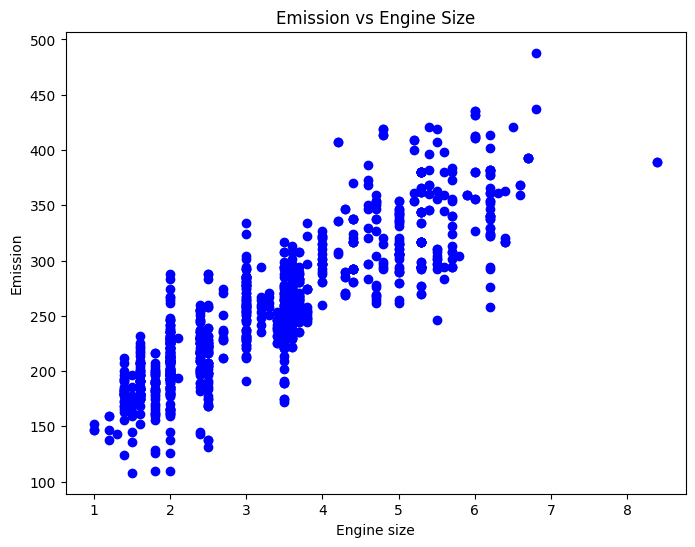

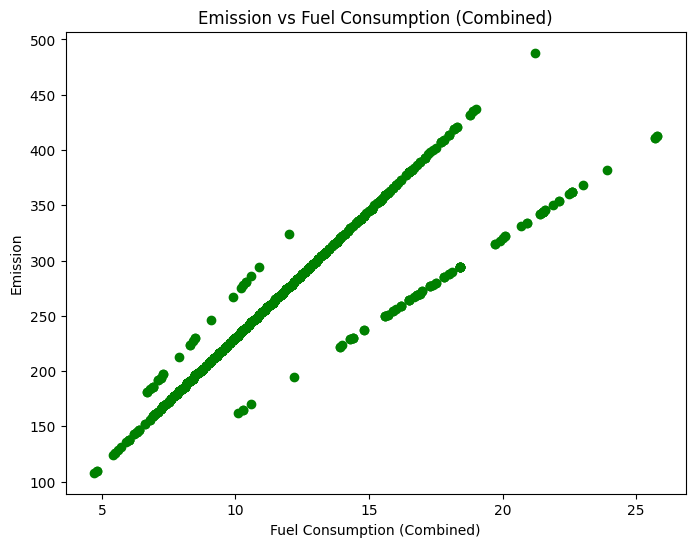

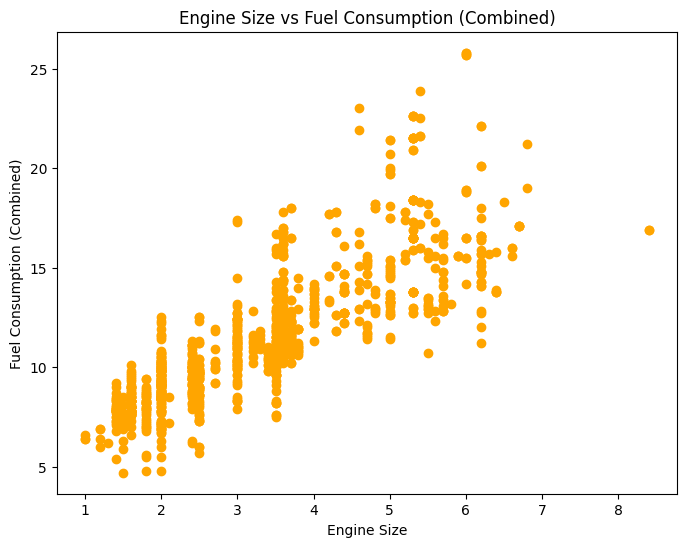

Coefficients: [[9.38057136 8.56221401 9.50350628]]
Mean Squared Error (MSE): 554.05
Variance score: 0.87
Coefficients: [[9.42686817 8.44517871 5.47379775 3.9470422 ]]
Residual sum of squares: 551.84
Variance score: 0.87


In [12]:
if __name__ == "__main__":
    main()